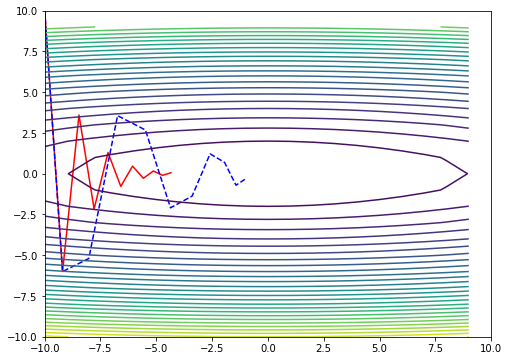

In [18]:
import numpy as np
from funcs import *
import matplotlib.pyplot as plt

# ----- 定义 optimizer ---
class Momentum(object):
    def __init__(self, momentum=0.9, lr=0.1):
        self.momentum = momentum
        self.lr = lr
        self.v = None

    def update(self, params, grads):
        if self.v == None:
            self.v = dict()
            for key, value in params.items():
                self.v[key] = np.zeros_like(value)

        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

class SGD(object):
    def __init__(self, lr):
        self.lr = lr

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

            
def f(X):
    return (1/20) * X[0]**2 + X[1]**2


# ----- 测试股 -----
learning_rate = 0.8
momentum = 0.55
optimizer_sgd = SGD(learning_rate)
optimizer_mom = Momentum(momentum, learning_rate)
update_times = 10

# SGD
X_sgd = np.array([-10.0, 10.0])
params_sgd = {}
params_sgd['X'] = X_sgd
grads_sgd = {}

# Mom
X_mom = np.array([-10.0, 10.0])
params_mom = {}
params_mom['X'] = X_mom
grads_mom = {}

# 为了绘图方便定义的list
x_sgd_list = list()  # x_sgd_list 存放的是 sgd 优化的 x轴 的改变
y_sgd_list = list()
x_mom_list = list()
y_mom_list = list()

# 把初始点放进列表
x_sgd_list.append(X_sgd[0]) # [-10]
y_sgd_list.append(X_sgd[1]) # [10]
x_mom_list.append(X_mom[0]) # [-10]
y_mom_list.append(X_mom[1]) # [10]

for i in range(update_times):
    # 求梯度
    grads_sgd['X'] = numerical_gradient(f, params_sgd['X'])
    grads_mom['X'] = numerical_gradient(f, params_mom['X'])
    # 梯度下降
    optimizer_sgd.update(params_sgd, grads_sgd)
    optimizer_mom.update(params_mom, grads_mom)
    # 把每次梯度下降后的坐标存进列表
    x_sgd_list.append(X_sgd[0])
    y_sgd_list.append(X_sgd[1])
    x_mom_list.append(X_mom[0])
    y_mom_list.append(X_mom[1])


# 绘图配置
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

# 等高线数据
x = np.arange(-10,10,1)
y = x.copy()
x,y=np.meshgrid(x, y) # x,y都是二维数组 (10,10)
X = np.array([x,y]) # X 是三维数组 (2,10,10)
z = f(X) # z 是二维数组 (10,10)

    # 梯度图
ax.plot(x_sgd_list, y_sgd_list, 'r-')
ax.plot(np.array(x_mom_list), np.array(y_mom_list), 'b--')
    # 等高线图
ax.contour(X[0],X[1],z,levels=30) # 这里x,y轴不一定要一维数组，二维也行，只要数据一一对应就可
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
plt.show()
